<figure>
  <IMG SRC="https://raw.githubusercontent.com/pastas/pastas/master/doc/_static/Art_logo.jpg" WIDTH=250 ALIGN="right">
</figure>

# Menyanthes File
*Developed by Ruben Caljé*

Menyanthes is timeseries analysis software used by many people in the Netherlands. In this example a Menyanthes-file with one observation-series is imported, and simulated. There are several stresses in the Menyanthes-file, among which are three groundwater extractions with a significant influence on groundwater head.

In [1]:
# First perform the necessary imports
import matplotlib.pyplot as plt
import pastas as ps

%matplotlib notebook

## 1. Importing the Menyanthes-file
Import the Menyanthes-file with observations and stresses. Then plot the observations, together with the diferent stresses in the Menyanthes file.

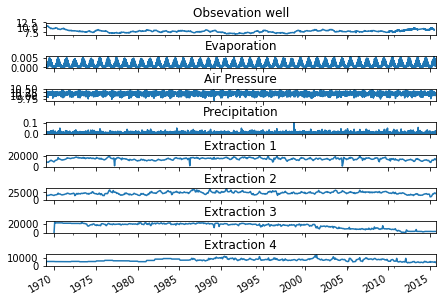

In [2]:
# how to use it?
fname = '../data/MenyanthesTest.men'
meny = ps.read.MenyData(fname)

# plot some series
f1, axarr = plt.subplots(len(meny.IN)+1, sharex=True)
oseries = meny.H['Obsevation well']["values"]
oseries.plot(ax=axarr[0])
axarr[0].set_title(meny.H['Obsevation well']["Name"])
for i, val in enumerate(meny.IN.items()):
    name, data = val
    data["values"].plot(ax=axarr[i+1])
    axarr[i+1].set_title(name)
plt.tight_layout(pad=0)
plt.show()

## 2. Run a model
Make a model with precipitation, evaporation and three groundwater extractions.

In [3]:
# Create the time series model
ml = ps.Model(oseries)

# Add precipitation
IN = meny.IN['Precipitation']['values']
IN.index = IN.index.round("D")
IN2 = meny.IN['Evaporation']['values']
IN2.index = IN2.index.round("D")
ts = ps.StressModel2([IN, IN2], ps.Gamma, 'Recharge')
ml.add_stressmodel(ts)

# Add well extraction 1
# IN = meny.IN['Extraction 1']
# # extraction amount counts for the previous month
# ts = ps.StressModel(IN['values'], ps.Hantush, 'Extraction_1', up=False,
#                     settings="well")
# ml.add_stressmodel(ts)

# Add well extraction 2
IN = meny.IN['Extraction 2']
# extraction amount counts for the previous month
ts = ps.StressModel(IN['values'], ps.Hantush, 'Extraction_2', up=False,
                    settings="well")
ml.add_stressmodel(ts)

# Add well extraction 3
IN = meny.IN['Extraction 3']
# extraction amount counts for the previous month
ts = ps.StressModel(IN['values'], ps.Hantush, 'Extraction_3', up=False,
                    settings="well")
ml.add_stressmodel(ts)

# Solve the model (can take around 20 seconds..)
ml.solve()

INFO: Cannot determine frequency of series None
INFO: Inferred frequency from time series None: freq=D 
INFO: Inferred frequency from time series None: freq=D 
INFO: Cannot determine frequency of series None
INFO: Time Series None: values of stress were transformedto daily values (frequency not altered) with: divide
INFO: Time Series None: values of stress were transformedto daily values (frequency not altered) with: divide
INFO: Time Series None was sampled down to freq D with method timestep_weighted_resample
INFO: Cannot determine frequency of series None
INFO: Time Series None: values of stress were transformedto daily values (frequency not altered) with: divide
INFO: Time Series None: values of stress were transformedto daily values (frequency not altered) with: divide
INFO: Time Series None was sampled down to freq D with method timestep_weighted_resample
INFO: Time Series None: values of stress were transformedto daily values (frequency not altered) with: divide
INFO: Time Serie

Model Results Observations                Fit Statistics
nfev     8                      EVP                93.81
nobs     2843                   R2                  0.94
noise    True                   RMSE                0.22
tmin     1960-04-28 00:00:00    AIC                14.09
tmax     2015-06-29 00:00:00    BIC                85.53
freq     D                      ___                     
warmup   3650 days 00:00:00     ___                     
solver   LeastSquares           ___                     

Parameters (12 were optimized)
                      optimal   stderr     initial  vary
Recharge_A        1769.558531   ±3.28%  210.498526  True
Recharge_n           1.041631   ±1.52%    1.000000  True
Recharge_a         718.996058   ±5.93%   10.000000  True
Recharge_f          -1.048179   ±3.86%   -1.000000  True
Extraction_2_A      -0.003745   ±0.95%   -0.002620  True
Extraction_2_rho     0.182700   ±9.90%    1.000000  True
Extraction_2_cS   1826.220540  ±10.14%  100.000000  True

## 3. Plot the decomposition
Show the decomposition of the groundwater head, by plotting the influence on groundwater head of each of the stresses.

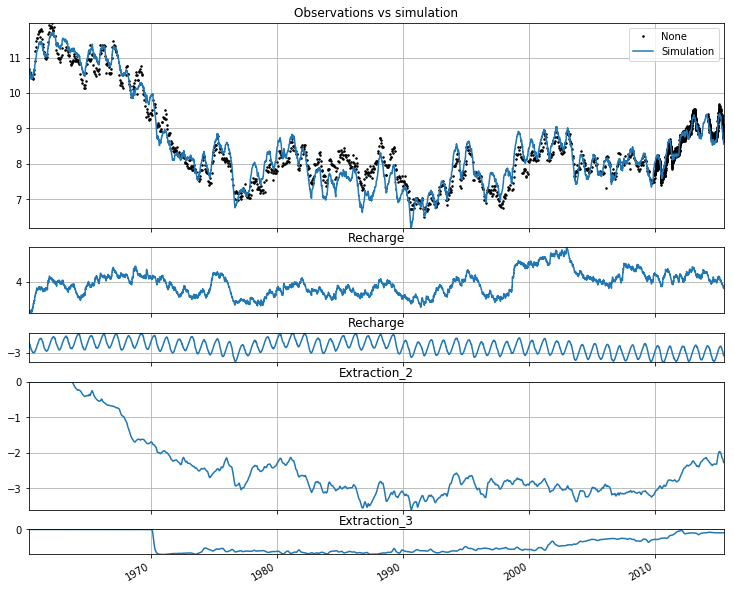

In [4]:
ax = ml.plots.decomposition(ytick_base=1.)
ax[0].set_title('Observations vs simulation')
ax[0].legend()
ax[0].figure.tight_layout(pad=0)